In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import gymnasium as gym
from gymnasium import spaces
import numpy as np
import pickle
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import pylab as plt

import DDPG
import torch

mps


## Helper Functions

In [3]:
def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)    

In [4]:
def run(env, agent, n_episodes=100, noise=0):
    rewards = []
    observations = []
    actions = []
    for ep in range(1, n_episodes+1):
        ep_reward = 0
        state, _info = env.reset()
        for t in range(2000):
            action = agent.act(state, noise)
            state, reward, done, _trunc, _info = env.step(action)
            observations.append(state)
            actions.append(action)
            ep_reward += reward
            if done or _trunc:
                break
        rewards.append(ep_reward)
        ep_reward = 0
    print(f'Mean reward: {np.mean(rewards)}')
    observations = np.asarray(observations)
    actions = np.asarray(actions)
    return observations, actions, rewards

# DDPG training stats

In [5]:
env_name = "Pendulum-v1"

eps=0.1
ts=32
lr=0.0001
s=None

with open(f"./results/DDPG_{env_name}-eps{eps}-t{ts}-l{lr}-s{s}-stat.pkl", 'rb') as f:
    data = pickle.load(f)
    rewards = np.asarray(data["rewards"])
    losses =  np.asarray(data["losses"])

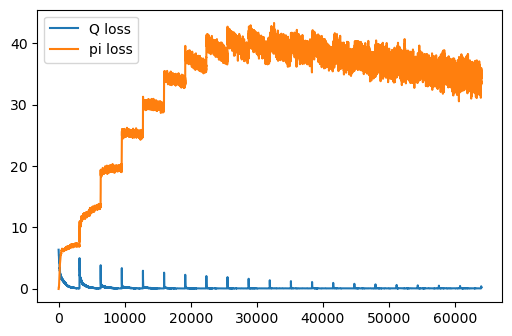

In [6]:
fig=plt.figure(figsize=(6,3.8))
plt.plot(running_mean(losses[:,0],10),label=f"Q loss")
plt.plot(running_mean(losses[:,1],10),label=f"pi loss")
plt.legend()

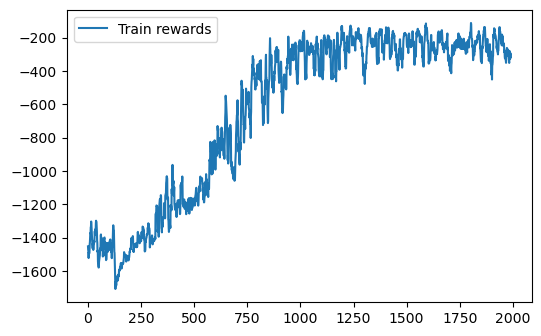

In [7]:
fig=plt.figure(figsize=(6,3.8))
plt.plot(running_mean(rewards,10),label=f"Train rewards")
plt.legend()

## value function

In [8]:
def plot_Q_function(q_function, observations, actions, plot_dim1=0, plot_dim2=2,
                    label_dim1="cos(angle)", label_dim2="angular velocity"):
    plt.rcParams.update({'font.size': 12})
    values =q_function.predict(np.hstack([observations,actions]))
    
    fig = plt.figure(figsize=[10,8])
    ax = fig.add_subplot()
    surf = ax.scatter (observations[:,plot_dim1], observations[:,plot_dim2],  c = values, cmap=cm.coolwarm)
    ax.set_xlabel(label_dim1)
    ax.set_ylabel(label_dim2)

    return fig

In [9]:
render_mode = None
env = gym.make(env_name, render_mode=render_mode)

In [10]:
episodes=2000
eps=0.1
ts=32
lr=0.0001
s=None

checkpoint = f"./results/DDPG_{env_name}_{episodes}-eps{eps}-t{ts}-l{lr}-s{s}.pth"

TODO: 

Initialize the DDPGAgent and load the checkpoint 

run 100 runs with noise 0.2 (see run function)

use the helper function above to plot the Q function

In [11]:
ddpg = DDPG.DDPGAgent(env.observation_space, env.action_space, eps=eps, learning_rate_actor=lr,
                       update_target_every=100)
state = torch.load(checkpoint)
ddpg.restore_state(state)

In [12]:
obs, actions, rewards = run(env, ddpg, n_episodes=100, noise=0.0)

Mean reward: -140.51416272197798


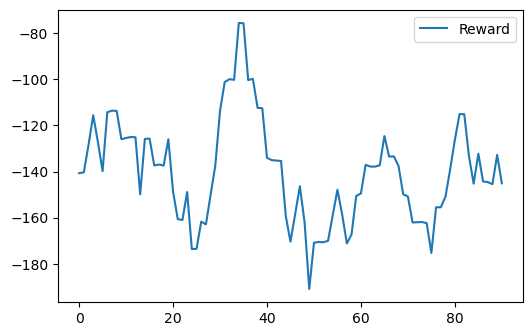

In [13]:
fig=plt.figure(figsize=(6,3.8))
plt.plot(running_mean(rewards, 10),label=f"Reward")
plt.legend()

## HalfCheetah

In [52]:
env_name = "HalfCheetah-v4"
episodes=6000
eps=0.1
ts=32
lr=0.0001
s=None

checkpoint = f"./results/DDPG_{env_name}_{episodes}-eps{eps}-t{ts}-l{lr}-s{s}.pth"

In [56]:
with open(f"./results/DDPG_{env_name}-eps{eps}-t{ts}-l{lr}-s{s}-stat.pkl", 'rb') as f:
    data = pickle.load(f)
    rewards = np.asarray(data["rewards"])
    losses =  np.asarray(data["losses"])

# Cheetah train stats

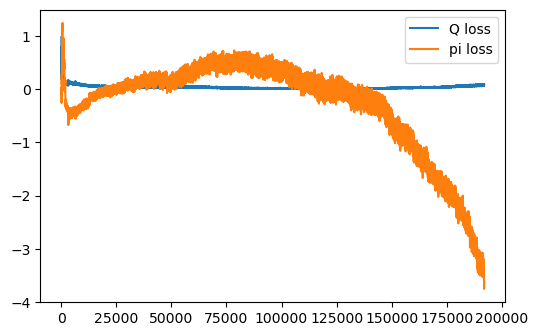

In [57]:
fig=plt.figure(figsize=(6,3.8))
plt.plot(running_mean(losses[:,0],10),label=f"Q loss")
plt.plot(running_mean(losses[:,1],10),label=f"pi loss")
plt.legend()

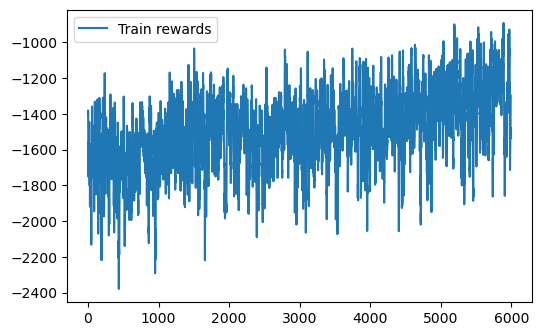

In [58]:
fig=plt.figure(figsize=(6,3.8))
plt.plot(running_mean(rewards,10),label=f"Train rewards")
plt.legend()

# Cheetah testing

In [59]:
render_mode=None
env = gym.make(env_name, render_mode=render_mode)

In [60]:
ddpg = DDPG.DDPGAgent(env.observation_space, env.action_space, eps=eps, learning_rate_actor=lr,
                       update_target_every=100)
state = torch.load(checkpoint)
ddpg.restore_state(state)

In [61]:
obs, actions, rewards = run(env, ddpg, n_episodes=100, noise=0.0)

Mean reward: -2162.1155657782037


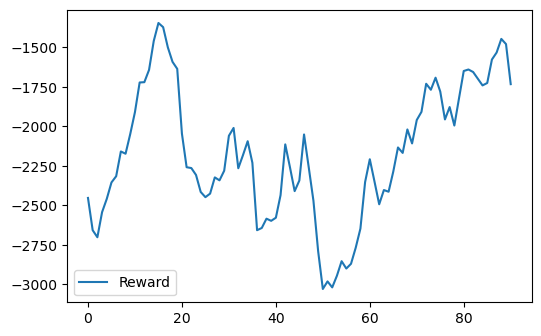

In [62]:
fig=plt.figure(figsize=(6,3.8))
plt.plot(running_mean(rewards, 10),label=f"Reward")
plt.legend()